## Importing the required libraries

In [13]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [14]:
from keras import regularizers

In [15]:
import os

In [16]:
mylist= os.listdir('RawData/')

In [17]:
type(mylist)

list

In [18]:
print(mylist[1438])

03-01-08-02-02-02-23.wav


In [19]:
print(mylist[400][6:-16])

03


## Plotting the audio file's waveform and its spectrogram

In [20]:
data, sampling_rate = librosa.load('RawData/03-01-08-02-02-02-23.wav')

Populating the interactive namespace from numpy and matplotlib


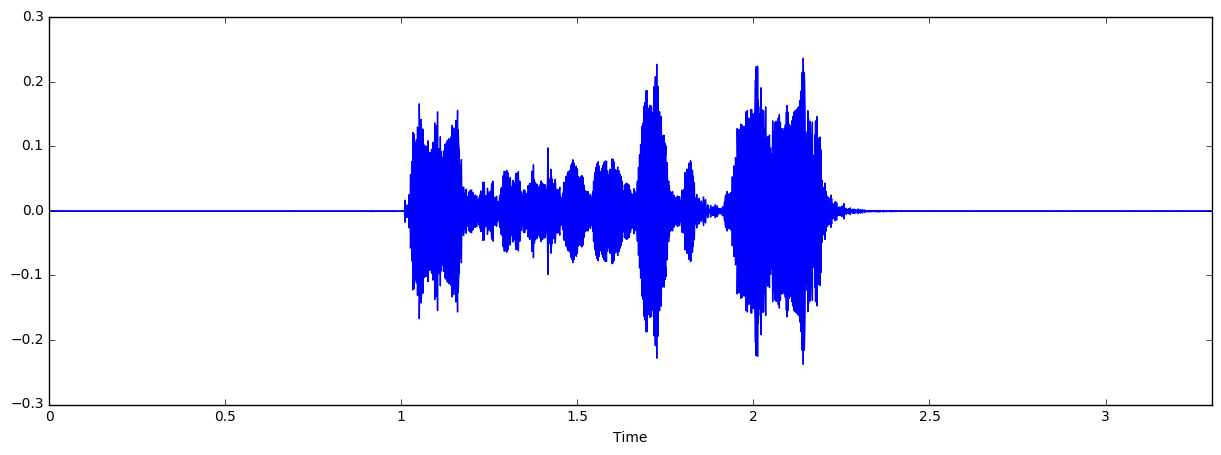

In [21]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

## Setting the labels

In [23]:
gender_list=[]
for item in mylist:
    if int(item[18:-4])%2==0:
        #print (item)
        gender_list.append('female')
    elif int(item[18:-4])%2==1:
        #print (item)
        gender_list.append('male')

In [24]:
labels = pd.DataFrame(gender_list)

In [25]:
labels

,0
0,male
1,female
2,male
3,female
4,male
5,female
6,male
7,female
8,male
9,female


## Getting the features of audio files using librosa

In [26]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    X, sample_rate = librosa.load('RawData/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    #[float(i) for i in feature]
    #feature1=feature[:135]
    df.loc[bookmark] = [feature]
    bookmark=bookmark+1       

In [27]:
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01':
        print (mylist[index])
    #mylist[index][6:-16]

df[:5]

03-01-02-01-01-01-01.wav
03-01-02-01-01-01-02.wav
03-01-02-01-01-01-03.wav
03-01-02-01-01-01-04.wav
03-01-02-01-01-01-05.wav
03-01-02-01-01-01-06.wav
03-01-02-01-01-01-07.wav
03-01-02-01-01-01-08.wav
03-01-02-01-01-01-09.wav
03-01-02-01-01-01-10.wav
03-01-02-01-01-01-11.wav
03-01-02-01-01-01-12.wav
03-01-02-01-01-01-13.wav
03-01-02-01-01-01-14.wav
03-01-02-01-01-01-15.wav
03-01-02-01-01-01-16.wav
03-01-02-01-01-01-17.wav
03-01-02-01-01-01-18.wav
03-01-02-01-01-01-19.wav
03-01-02-01-01-01-20.wav
03-01-02-01-01-01-21.wav
03-01-02-01-01-01-22.wav
03-01-02-01-01-01-23.wav
03-01-02-01-01-01-24.wav
03-01-02-01-01-02-01.wav
03-01-02-01-01-02-02.wav
03-01-02-01-01-02-03.wav
03-01-02-01-01-02-04.wav
03-01-02-01-01-02-05.wav
03-01-02-01-01-02-06.wav
03-01-02-01-01-02-07.wav
03-01-02-01-01-02-08.wav
03-01-02-01-01-02-09.wav
03-01-02-01-01-02-10.wav
03-01-02-01-01-02-11.wav
03-01-02-01-01-02-12.wav
03-01-02-01-01-02-13.wav
03-01-02-01-01-02-14.wav
03-01-02-01-01-02-15.wav
03-01-02-01-01-02-16.wav


,feature
0,"[-65.8009712673, -65.8009712673, -65.800971267..."
1,"[-63.2142039684, -63.2142039684, -63.214203968..."
2,"[-60.2586496541, -60.2586496541, -60.258649654..."
3,"[-66.4880870635, -66.4880870635, -66.488087063..."
4,"[-60.2624446655, -60.3676217257, -64.739046639..."


In [28]:
df3 = pd.DataFrame(df['feature'].values.tolist())

df3[:5]

In [29]:
newdf = pd.concat([df3,labels], axis=1)

In [30]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [31]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-65.800971,-65.800971,-65.800971,-65.800971,-65.800971,-65.800971,-65.800971,-65.800971,-65.800971,-65.800971,...,-62.295248,-64.930130,-65.332128,-64.116934,-64.319911,-64.971422,-63.155779,-64.178668,-63.061902,male
1,-63.214204,-63.214204,-63.214204,-63.214204,-63.214204,-63.167273,-63.385486,-63.461856,-63.336160,-63.204256,...,-53.428584,-53.139486,-52.853875,-55.247733,-57.681998,-57.166072,-57.039674,-56.066060,-58.502809,female
2,-60.258650,-60.258650,-60.258650,-60.258650,-60.258650,-60.258650,-60.258650,-60.258650,-60.258650,-60.258650,...,-50.511304,-49.081509,-47.701069,-48.794907,-52.423779,-54.827965,-52.233280,-49.625140,-48.974823,male
3,-66.488087,-66.488087,-66.488087,-66.488087,-66.488087,-66.488087,-66.526982,-66.554370,-66.534395,-66.488087,...,-62.121766,-64.443918,-65.315325,-65.285077,-65.365458,-64.970735,-64.157288,-64.912971,-66.488087,female
4,-60.262445,-60.367622,-64.739047,-66.271230,-61.207477,-60.241174,-62.637524,-63.144472,-60.526856,-59.101800,...,-54.735956,-50.871346,-51.928354,-56.388860,-57.152922,-54.602237,-54.803893,-60.359017,-64.784380,male


In [32]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
12,-67.695279,-67.695279,-67.695279,-66.014364,-64.587205,-67.108221,-64.659667,-61.150446,-60.628962,-61.321539,...,-63.074128,-66.414172,-63.451540,-62.645082,-63.762902,-64.373973,-67.523539,-66.706863,-65.248799,male
1087,-57.579212,-56.605296,-54.541691,-52.072521,-51.737850,-53.638592,-55.301010,-52.643781,-53.001250,-54.280212,...,-53.441909,-53.790462,-53.310939,-54.311040,-50.969005,-53.342621,-54.402351,-54.011959,-53.159017,female
247,-58.283959,-53.700073,-53.545721,-53.362565,-52.145430,-54.138054,-55.785798,-55.508413,-54.702792,-54.091111,...,-51.119027,-50.630452,-49.336152,-50.113635,-49.553715,-50.481816,-49.088211,-50.398920,-50.364273,female
543,-64.336446,-64.336446,-57.386885,-54.828974,-60.108171,-63.158180,-63.969963,-63.356257,-64.336446,-64.336446,...,-61.941317,-61.124230,-60.719647,-62.290327,-61.698920,-62.312703,-63.798234,-60.574868,-58.976167,female
336,-65.427316,-65.427316,-65.261778,-65.427316,-65.427316,-65.427316,-65.027579,-65.404326,-65.427316,-58.999030,...,-60.775384,-64.036734,-64.463488,-65.204989,-64.805729,-64.463925,-61.400518,-60.954330,-62.738246,male
1353,-48.538623,-48.003284,-46.907686,-47.696368,-46.941399,-45.767402,-44.641053,-44.400641,-46.536159,-47.851477,...,-46.826407,-47.611079,-46.968926,-47.529827,-47.361348,-47.435085,-47.885197,-47.940734,-47.996616,female
518,-54.992413,-55.728838,-55.881228,-57.632447,-58.302978,-57.817816,-55.465639,-55.143078,-55.632496,-57.270886,...,-55.034954,-52.512906,-51.140800,-51.344863,-51.856893,-53.659036,-52.118101,-50.034409,-48.532700,male
1251,-58.574118,-58.574118,-58.574118,-58.574118,-58.574118,-58.574118,-58.574118,-58.574118,-58.574118,-58.574118,...,-58.574118,-58.574118,-58.432081,-57.360532,-57.882998,-58.093829,-58.017072,-58.634021,-58.574118,female
729,-48.420940,-49.284463,-49.991965,-49.314250,-48.412724,-47.635499,-47.967499,-49.530856,-47.706297,-44.551816,...,-28.318162,-28.502314,-28.992038,-30.271969,-32.122017,-30.649439,-27.957858,-17.029412,-10.614690,female
156,-57.304340,-57.513506,-57.424149,-60.285886,-63.514341,-59.822909,-59.655570,-60.264965,-60.922122,-63.632326,...,-66.580161,-65.908506,-65.687954,-59.147327,-57.582897,-60.386011,-62.520436,-63.540304,-65.164728,male


In [33]:
rnewdf=rnewdf.fillna(0)

## Dividing the data into test and train

In [34]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [35]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
609,-50.122292,-47.303445,-47.406759,-47.755926,-45.778542,-45.284749,-45.975471,-47.275413,-48.067036,-47.671568,...,-51.406283,-50.500618,-49.876385,-49.789728,-49.803854,-48.662171,-46.918088,-46.868940,-50.626877,female
360,-65.243346,-65.243346,-65.243346,-65.243346,-65.243346,-65.243346,-65.243346,-65.243346,-65.243346,-65.117574,...,-61.924273,-56.156915,-55.677974,-61.117810,-58.568728,-57.136813,-58.619914,-60.068312,-57.350593,male
894,-64.534291,-64.325076,-63.853970,-64.193312,-63.725819,-63.490842,-63.156243,-63.427652,-62.722235,-61.840598,...,-54.486860,-54.230501,-53.384236,-53.845538,-54.256861,-52.946319,-53.507972,-52.474002,-51.640947,male
316,-63.228597,-63.228597,-61.191795,-58.402492,-57.589066,-58.594870,-58.950493,-58.692236,-58.903592,-57.162339,...,-63.228597,-59.697888,-56.864815,-57.451444,-62.580383,-61.967364,-59.347267,-58.372088,-58.760044,male
230,-48.804819,-52.412845,-54.739909,-50.976137,-51.428154,-51.092459,-49.567096,-49.011941,-48.885962,-49.207573,...,-40.730366,-39.789640,-39.102859,-40.432633,-41.893508,-42.905252,-40.767274,-41.936145,-43.540240,male
241,-63.831224,-63.831224,-63.831224,-63.350341,-63.392945,-63.535973,-61.527138,-59.741901,-60.035460,-60.794599,...,-40.272667,-40.879632,-38.603229,-37.423105,-37.418511,-37.123837,-38.194133,-34.119849,-29.075197,female
417,-42.172598,-42.172598,-42.146680,-42.172598,-42.172598,-41.897548,-41.546187,-41.409679,-41.293315,-41.251104,...,-36.890311,-38.127864,-39.780451,-40.361989,-40.608430,-42.482616,-41.637823,-41.857755,-42.054779,female
584,-44.627986,-46.197439,-44.684444,-44.286498,-43.755600,-45.316459,-46.033277,-46.344894,-46.422737,-46.174908,...,-30.272419,-30.346282,-31.042972,-32.774784,-34.085209,-36.362231,-39.124245,-39.757010,-41.383411,male
1258,-57.242510,-55.023165,-54.382124,-55.727116,-54.904653,-55.443820,-54.799368,-54.979560,-55.338286,-55.462773,...,-53.414806,-54.487051,-56.974286,-60.323581,-59.273292,-59.083786,-57.853121,-58.491580,-56.709638,male
152,-69.390872,-69.635251,-69.635251,-69.635251,-69.635251,-69.635251,-69.384457,-69.635251,-68.145998,-68.051859,...,-50.872716,-51.354904,-48.950172,-47.477786,-47.992646,-47.979986,-48.897959,-45.899861,-47.223623,male


In [36]:
trainfeatures = train.iloc[:, :-1]

In [37]:
trainlabel = train.iloc[:, -1:]

In [38]:
testfeatures = test.iloc[:, :-1]

In [39]:
testlabel = test.iloc[:, -1:]

In [40]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


C:\Users\uids6626\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
y_train

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.]])

In [42]:
X_train.shape

(1116, 216)

## Changing dimension for CNN model

In [43]:

x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [44]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_2 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 128)           82048     
__________

In [46]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


### Removed the whole training part for avoiding unnecessary long epochs list

In [47]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=50,validation_data=(x_testcnn, y_test))

Train on 1116 samples, validate on 324 samples
Epoch 1/50
1116/1116 [==============================] - 10s 9ms/step - loss: 0.7425 - acc: 0.5099 - val_loss: 0.6228 - val_acc: 0.6636
Epoch 2/50
1116/1116 [==============================] - 10s 9ms/step - loss: 0.5689 - acc: 0.7464 - val_loss: 0.5320 - val_acc: 0.8302
Epoch 3/50
1116/1116 [==============================] - 9s 9ms/step - loss: 0.4853 - acc: 0.8324 - val_loss: 0.5228 - val_acc: 0.7346
Epoch 4/50
1116/1116 [==============================] - 10s 9ms/step - loss: 0.4382 - acc: 0.8495 - val_loss: 0.4203 - val_acc: 0.8920
Epoch 5/50
1116/1116 [==============================] - 9s 8ms/step - loss: 0.3984 - acc: 0.8611 - val_loss: 0.3864 - val_acc: 0.8981
Epoch 6/50
1116/1116 [==============================] - 9s 8ms/step - loss: 0.3669 - acc: 0.8826 - val_loss: 0.3896 - val_acc: 0.8488
Epoch 7/50
1116/1116 [==============================] - 9s 8ms/step - loss: 0.3438 - acc: 0.8835 - val_loss: 0.3485 - val_acc: 0.8920
Epoch 8/50
1

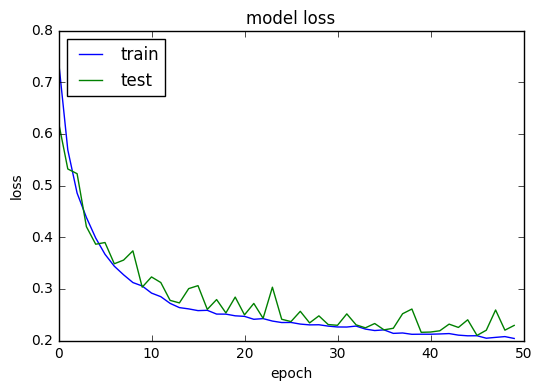

In [130]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving the model

In [131]:
model_name = 'gender_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'gender_model')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at D:\Workspace\Speech-Emotion-Analyzer-master\saved_models\gender_Detection_Model.h5 


In [50]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write("gender_model/"+model_json)

## Loading the model

In [51]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('gender_model/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("gender_model/gender_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 90.12%


## Predicting Gender on the test data

In [52]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

324/324 [==============================] - 1s 2ms/step


In [53]:
preds

array([[  3.51364389e-02,   9.64863598e-01],
       [  1.29564144e-02,   9.87043560e-01],
       [  9.93393481e-01,   6.60656858e-03],
       [  8.03669095e-02,   9.19633090e-01],
       [  6.38231542e-03,   9.93617654e-01],
       [  2.70793084e-02,   9.72920716e-01],
       [  1.20380428e-02,   9.87961948e-01],
       [  7.24396050e-01,   2.75603920e-01],
       [  9.89116371e-01,   1.08836163e-02],
       [  1.44630428e-02,   9.85536993e-01],
       [  4.90868986e-02,   9.50913072e-01],
       [  9.97501791e-01,   2.49825441e-03],
       [  3.61385792e-01,   6.38614237e-01],
       [  9.27906811e-01,   7.20931217e-02],
       [  9.97807920e-01,   2.19204137e-03],
       [  9.80434597e-01,   1.95654295e-02],
       [  1.28718257e-01,   8.71281743e-01],
       [  9.53093410e-01,   4.69066128e-02],
       [  8.91126812e-01,   1.08873181e-01],
       [  1.50843905e-02,   9.84915614e-01],
       [  7.40174472e-01,   2.59825557e-01],
       [  9.72486450e-04,   9.99027491e-01],
       [  

In [54]:
preds1=preds.argmax(axis=1)

In [56]:
preds1

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1,

In [57]:
abc = preds1.astype(int).flatten()

In [58]:
predictions = (lb.inverse_transform((abc)))

In [59]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male
1,male
2,female
3,male
4,male
5,male
6,male
7,female
8,female
9,male


In [60]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [61]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male
1,male
2,female
3,male
4,male
5,male
6,male
7,female
8,female
9,male


In [62]:
finaldf = actualdf.join(preddf)

## Actual v/s Predicted emotions

In [63]:
finaldf[170:180]

,actualvalues,predictedvalues
170,male,male
171,male,male
172,male,female
173,male,male
174,male,male
175,female,female
176,male,female
177,female,female
178,male,male
179,male,male


In [64]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female,148
male,176


In [65]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female,174
male,150


In [66]:
finaldf.to_csv('Predictions.csv', index=False)

## Live Demo

#### The file 'output10.wav' in the next cell is the file that was recorded live

In [116]:
data, sampling_rate = librosa.load('output10.wav')

Populating the interactive namespace from numpy and matplotlib


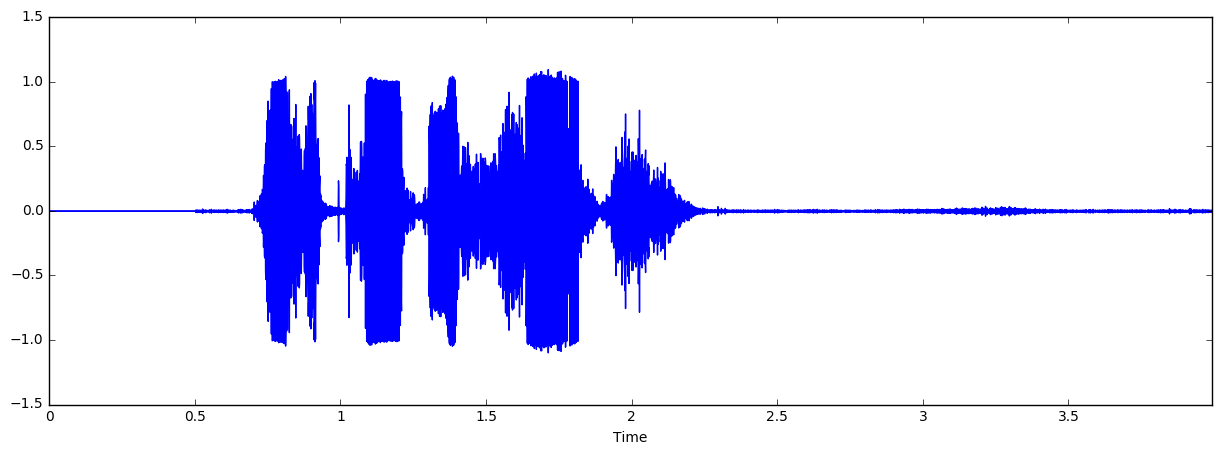

In [117]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [118]:
import pyaudio
import wave

CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output11.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


In [119]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output11.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)

sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [120]:
livedf2= pd.DataFrame(data=livedf2)

In [121]:
livedf2 = livedf2.stack().to_frame().T

In [122]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-44.756083,-46.983171,-53.566886,-52.389235,-48.629429,-48.805389,-50.283739,-53.695789,-53.563571,-50.185181,...,-39.906402,-39.697229,-38.692289,-40.060852,-44.645798,-47.101352,-43.322023,-42.039822,-35.766766,-33.274945


In [123]:
twodim= np.expand_dims(livedf2, axis=2)

In [124]:
from keras.models import model_from_json
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 0us/step


In [125]:
livepreds

array([[ 0.7445938 ,  0.25540617]], dtype=float32)

In [126]:
livepreds1=livepreds.argmax(axis=1)

In [127]:
liveabc = livepreds1.astype(int).flatten()

In [128]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['female'], dtype=object)